In [1]:
# Import Required Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load Dataset
df = pd.read_csv('IMDb Movies India.csv', encoding='latin1')

# Display first 5 rows
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
# Shape of dataset (rows, columns)
df.shape

(15509, 10)

In [6]:
# Dataset information (data types & null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [11]:
# Statistical summary of numerical columns
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [12]:
# Check missing values in each column
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [13]:
# Data Cleaning & Feature Engineering
# Convert Year: "(2019)" → 2019
df['Year'] = df['Year'].str.extract('(\d{4})')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Duration: "109 min" → 109
df['Duration'] = df['Duration'].str.extract('(\d+)')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

# Votes: "1,234" → 1234
df['Votes'] = df['Votes'].str.replace(',', '')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')


In [14]:
# Handle Missing Values
# Drop rows where target variable (Rating) is missing

df = df.dropna(subset=['Rating'])


In [15]:
# Fill missing numerical values with median
df[['Year', 'Duration', 'Votes']] = df[['Year', 'Duration', 'Votes']].fillna(
    df[['Year', 'Duration', 'Votes']].median()
)


In [19]:
# Verify 
df[['Year','Duration','Votes','Rating']].isnull().sum()


Year        0
Duration    0
Votes       0
Rating      0
dtype: int64

In [20]:
# Independent variables (features)
X = df[['Year', 'Duration', 'Votes']]
# Target variable
y = df['Rating']


In [21]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [22]:
# Model Training
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=200, # Number of trees
    random_state=42,  # For reproducibility
    n_jobs=-1         # Use all CPU cores
)
# Train model
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [24]:
# Predict ratings on test data

y_pred = rf_model.predict(X_test)


In [27]:
# Model Evaluation

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 0.936071717344794
RMSE: 1.553612681456555
R2 Score: 0.1643402940990324


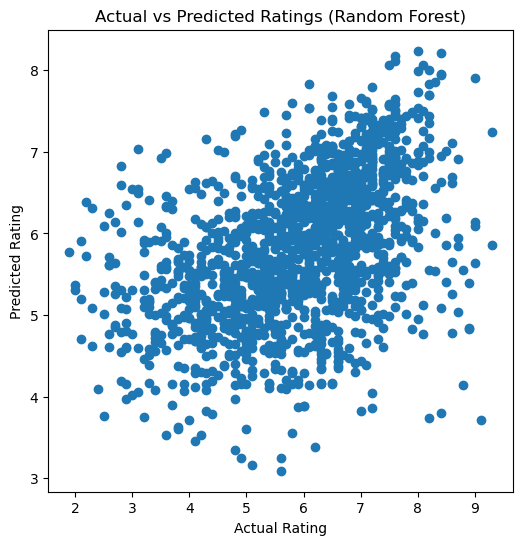

In [26]:
# Plot Actual vs Predicted Ratings
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Ratings (Random Forest)")
plt.show()
